![Add%20a%20heading%20%282%29%20(1).jpg](attachment:Add%20a%20heading%20%282%29%20(1).jpg)
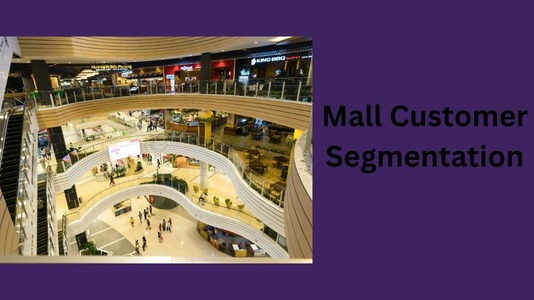

## Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
d1=pd.read_csv(r"C:\Users\ADMIN\Desktop\Prodigy infotech\Mall_Customers.csv")
d1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
plt.rcParams['figure.figsize']=[15,8]

In [49]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
d1.shape

(200, 5)

## Data Preprocessing

### Five point Summary

In [51]:
d1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Null value Treatment

In [52]:
d1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null values

### Outlier Treatment

In [53]:
q1=d1.quantile(0.25)
q3=d1.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
d2=d1[~(((d1>ul)|(d1<ll)).any(axis=1))]
d2.shape

(198, 5)

In [54]:
d1.shape

(200, 5)

there are huge outliers hence i left it untreated

### Skewness

In [55]:
d1.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The Skewness are very low hence,i left it untreated

### Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
d1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [58]:
ss=StandardScaler()
d1[['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]=ss.fit_transform(d1[['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

### Encoding

In [59]:
d1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [60]:
d1.replace({'Male':0,'Female':1},inplace=True)

In [61]:
d1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,0,-1.424569,-1.738999,-0.434801
1,-1.706091,0,-1.281035,-1.738999,1.195704
2,-1.688771,1,-1.352802,-1.700830,-1.715913
3,-1.671450,1,-1.137502,-1.700830,1.040418
4,-1.654129,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,1,-0.276302,2.268791,1.118061
196,1.671450,1,0.441365,2.497807,-0.861839
197,1.688771,0,-0.491602,2.497807,0.923953
198,1.706091,0,-0.491602,2.917671,-1.250054


## Principal Component Analysis

### Creating Covariance matrix

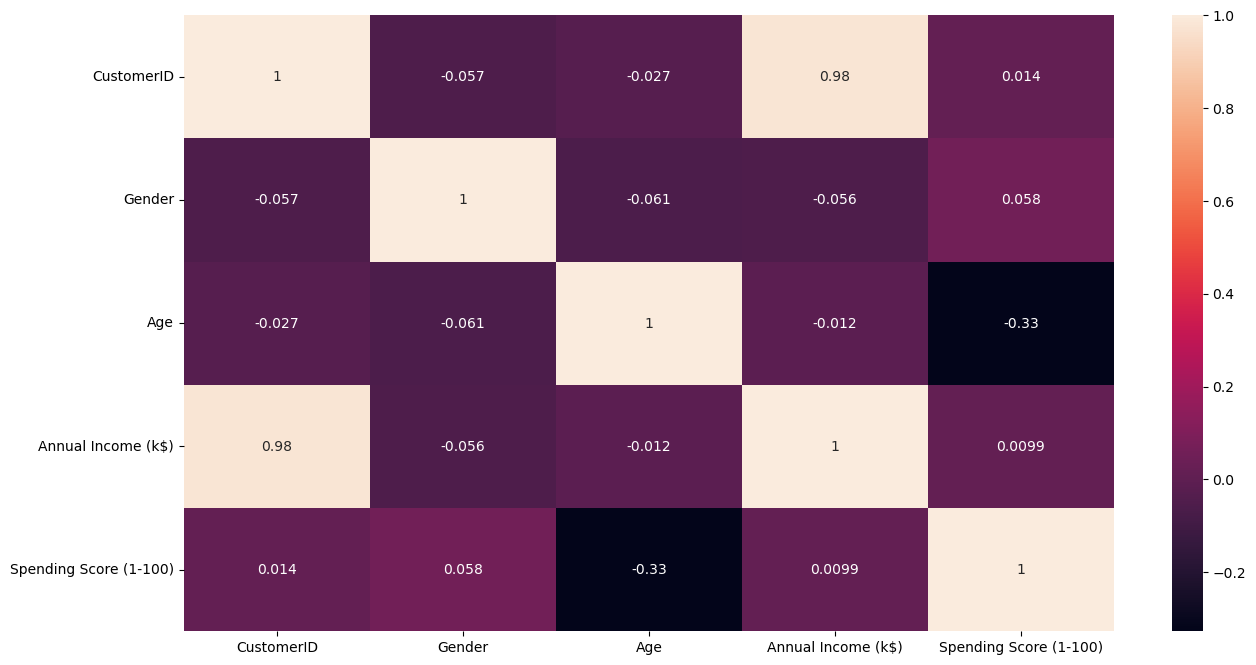

In [62]:
sns.heatmap(d1.corr(),annot=True)
plt.show()

In [63]:
d1.cov()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.005025,-0.028636,-0.026897,0.982461,0.013905
Gender,-0.028636,0.247638,-0.030366,-0.028142,0.028989
Age,-0.026897,-0.030366,1.005025,-0.012460,-0.328871
Annual Income (k$),0.982461,-0.028142,-0.012460,1.005025,0.009953
Spending Score (1-100),0.013905,0.028989,-0.328871,0.009953,1.005025


In [64]:
cov_mat=np.cov(d1.T)
cov_mat

array([[ 1.00502513, -0.02863577, -0.02689738,  0.98246077,  0.01390451],
       [-0.02863577,  0.24763819, -0.0303656 , -0.0281418 ,  0.02898937],
       [-0.02689738, -0.0303656 ,  1.00502513, -0.01246034, -0.3288712 ],
       [ 0.98246077, -0.0281418 , -0.01246034,  1.00502513,  0.00995261],
       [ 0.01390451,  0.02898937, -0.3288712 ,  0.00995261,  1.00502513]])

In [65]:
eigen_value,eigen_vector=np.linalg.eig(cov_mat)
eigen_value,eigen_vector

(array([1.98988999, 1.33420214, 0.02245587, 0.24503713, 0.67615356]),
 array([[-7.06321066e-01,  2.74559896e-02,  7.07208880e-01,
         -1.44883022e-02, -1.55241196e-03],
        [ 2.18838211e-02, -4.02439310e-02,  2.94765525e-03,
         -9.98941913e-01, -2.80881460e-03],
        [ 3.71916514e-02,  7.05473456e-01,  1.07027919e-02,
         -2.95628653e-02,  7.07061151e-01],
        [-7.05984628e-01,  3.73332576e-02, -7.06917210e-01,
         -1.90835121e-02,  9.78831373e-03],
        [-2.88814310e-02, -7.06073668e-01,  6.47960227e-04,
          2.58263311e-02,  7.07077378e-01]]))

In [66]:
eig_val=list(eigen_value)
eig_val

[1.9898899877159282,
 1.3342021427839919,
 0.022455873033478596,
 0.24503712742872133,
 0.6761535625052165]

In [67]:
eig_val.sort(reverse=True)
eig_val

[1.9898899877159282,
 1.3342021427839919,
 0.6761535625052165,
 0.24503712742872133,
 0.022455873033478596]

In [68]:
per=[]
for i in eig_val:
    a=(i/sum(eig_val))*100
    per.append(a)
per

[46.62633142844171,
 31.262507820037488,
 15.84336837539305,
 5.7416150572620985,
 0.5261773188656558]

In [69]:
cum_var=np.cumsum(per)
cum_var

array([ 46.62633143,  77.88883925,  93.73220762,  99.47382268,
       100.        ])

In [70]:
len(cum_var[cum_var<99.2])

3

we can tell that 3 principal components can tell about 99.2% variation within the data

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca_df=pd.DataFrame(data=pca.fit_transform(d1),columns=['pc1','pc2','pc3'])
pca_df

,pc1,pc2,pc3
0,-2.392310,-0.787697,1.327469
1,-2.338323,-1.837220,0.073115
2,-2.402448,0.129623,2.185060
3,-2.318615,-1.664185,0.083917
4,-2.342272,-0.243046,0.693267
...,...,...,...
195,2.803016,-0.871947,-0.613597
196,2.893059,1.041328,0.276696
197,3.013451,-0.837036,-0.329114
198,3.259314,0.714124,1.203994


## KMeans model

In [73]:
from sklearn.cluster import KMeans

In [74]:
wcss = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(pca_df)
    wcss.append(kmeans_model.inertia_)
print(wcss)

[511.92813182945, 371.51391941387476, 255.7668138927137, 205.78028379631334, 156.80461576408044, 140.82255044559483, 127.20058829126377, 112.43253436779112, 100.85739365791261]


### elbow plot

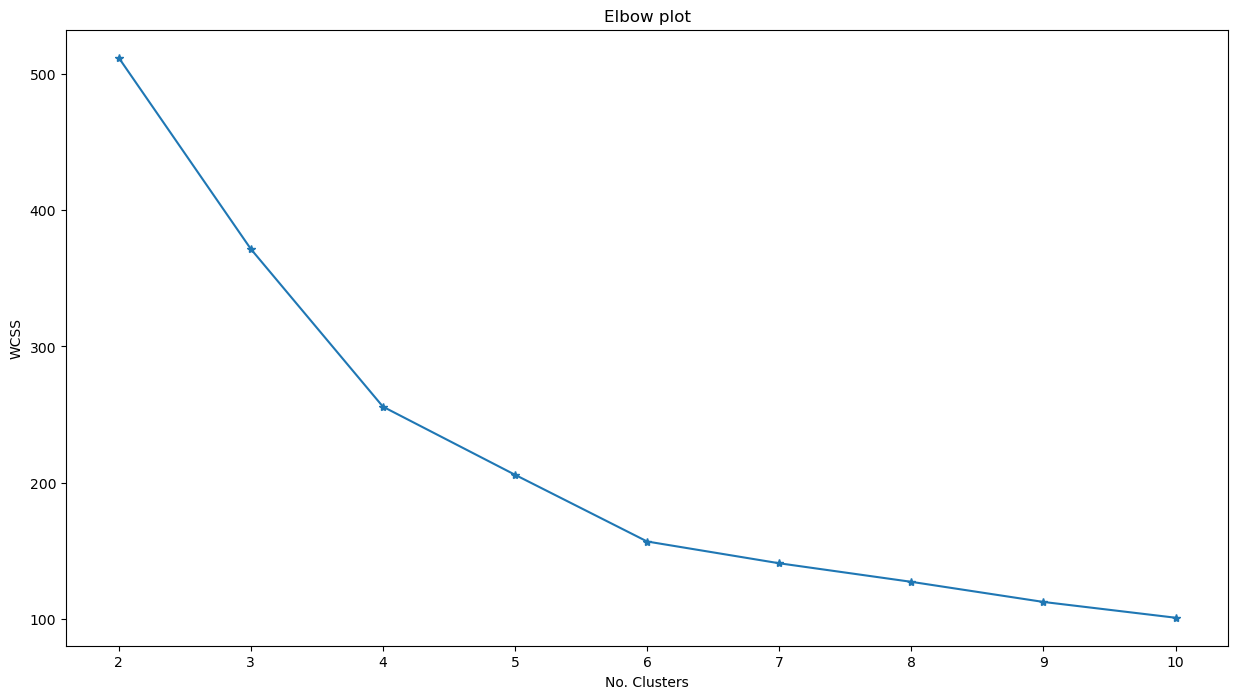

In [75]:
plt.plot(range(2,11), wcss, marker="*")
plt.title("Elbow plot")
plt.xlabel("No. Clusters")
plt.ylabel("WCSS")
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
sc = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(pca_df)
    sc.append(silhouette_score(pca_df, kmeans_model.labels_))
print(sc)

[0.3195335585078615, 0.3423869006319913, 0.4159068554583837, 0.42972557923723215, 0.4428038889937115, 0.42466146039425523, 0.39375818199290885, 0.38248379046285214, 0.3723524075707258]


from elbow plot silhoutte score we can tell that the optimum value for k_cluster is 6

In [78]:
kmean_model=KMeans(n_clusters=6,random_state=0)
kmean_model.fit(pca_df)

KMeans(n_clusters=6, random_state=0)

In [79]:
pca_df['Kmean label']=kmean_model.labels_

In [80]:
pca_df.head()

,pc1,pc2,pc3,Kmean label
0,-2.392310,-0.787697,1.327469,2
1,-2.338323,-1.837220,0.073115,2
2,-2.402448,0.129623,2.185060,5
3,-2.318615,-1.664185,0.083917,2
4,-2.342272,-0.243046,0.693267,5


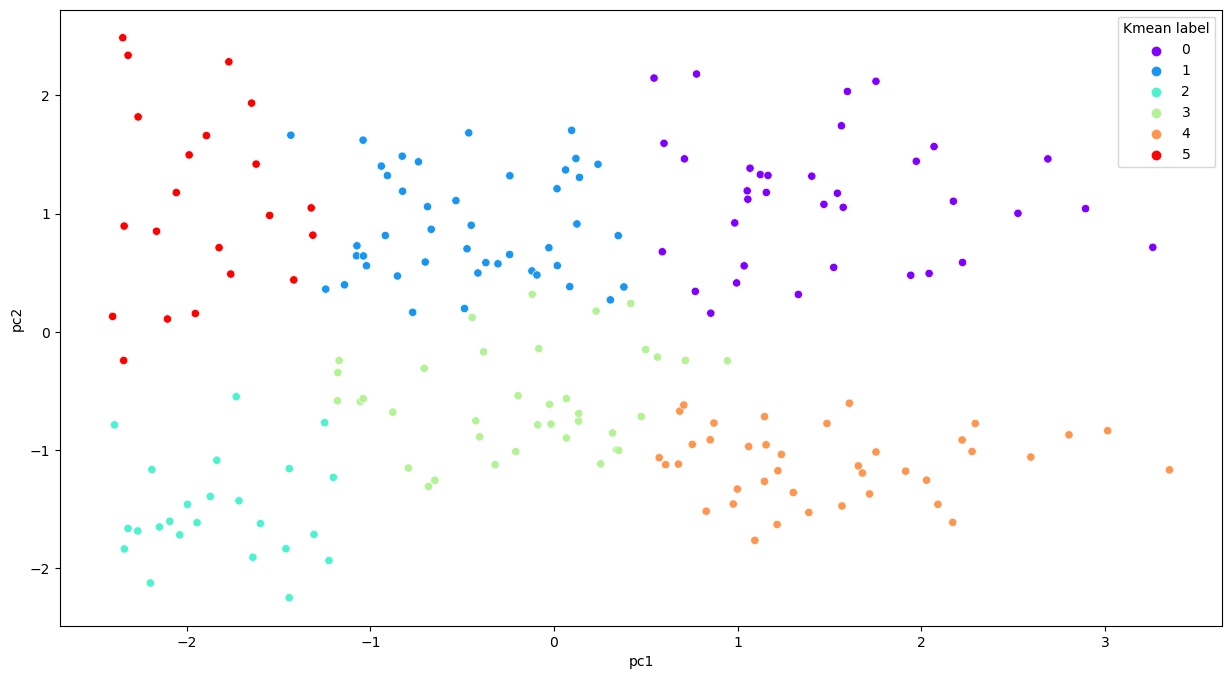

In [81]:
sns.scatterplot(x = pca_df['pc1'],
               y = pca_df['pc2'], hue = pca_df['Kmean label'], palette = 'rainbow')
plt.show()


 From the above kmean model we can able to cluster the customers based on their purchase history.This helps in improving the growth of the business by identifying the regular customers and helps in creating the better strategies to improve the business.